In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [2]:
!kaggle datasets download -d shebrahimi/financial-distress

Dataset URL: https://www.kaggle.com/datasets/shebrahimi/financial-distress
License(s): other
  0% 0.00/815k [00:00<?, ?B/s]
100% 815k/815k [00:00<00:00, 25.6MB/s]


In [3]:
!unzip /content/financial-distress.zip


Archive:  /content/financial-distress.zip
  inflating: Financial Distress.csv  


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

In [5]:
data = pd.read_csv("/content/Financial Distress.csv")

In [6]:
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [7]:
data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [8]:
print("Number of companies:",data.Company.unique().shape)

Number of companies: (422,)


In [9]:
'''The feature x80 is a categorical variable,
 which means that it can take on a limited number of discrete values.
 Since this feature is not related to the financial distress of the company,
 it is being removed from the dataset using the code snippet provided earlier'''
data = data[data.columns.drop(list(data.filter(regex='x80')))]

In [10]:
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x73,x74,x75,x76,x77,x78,x79,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,36.0,107.090,31.31,30.194,17.000,16.0,0.4,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,33.0,54.806,39.80,38.377,17.167,16.0,5.6,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,1.251000,7,27


In [11]:
null_values = data.isnull().sum()
print("Null value counts:")
print(null_values)

Null value counts:
Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x78                   0
x79                   0
x81                   0
x82                   0
x83                   0
Length: 85, dtype: int64


In [12]:
# Creating target vector and feature matrix
Y = data.iloc[:,2].values
for y in range(0,len(Y)): # Coverting target variable from continuous to binary form
       if Y[y] > -0.5:
              Y[y] = 0
       else:
              Y[y] = 1
X = data.iloc[:,3:].values

In [13]:
data

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x73,x74,x75,x76,x77,x78,x79,x81,x82,x83
0,1,1,0.0,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,0.060390,30,49
1,1,2,0.0,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,36.0,107.090,31.31,30.194,17.000,16.0,0.4,0.010636,31,50
2,1,3,0.0,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,-0.455970,32,51
3,1,4,1.0,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,33.0,54.806,39.80,38.377,17.167,16.0,5.6,-0.325390,33,52
4,2,1,0.0,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.0,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,22.0,100.000,100.00,100.000,17.125,14.5,-7.0,0.436380,4,41
3668,422,11,0.0,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,28.0,91.500,130.50,132.400,20.000,14.5,-16.0,0.438020,5,42
3669,422,12,0.0,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,32.0,87.100,175.90,178.100,20.000,14.5,-20.2,0.482410,6,43
3670,422,13,0.0,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,30.0,92.900,203.20,204.500,22.000,22.0,6.4,0.500770,7,44


In [14]:
# Counting number of observations for Healthy and and Bankrupt Companies:
num_zeros = 0
for num in Y:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(Y) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)

Number of observations for BANKRUPT companies(1's): 136
Number of observations for HEALTHY companies(0's): 3536


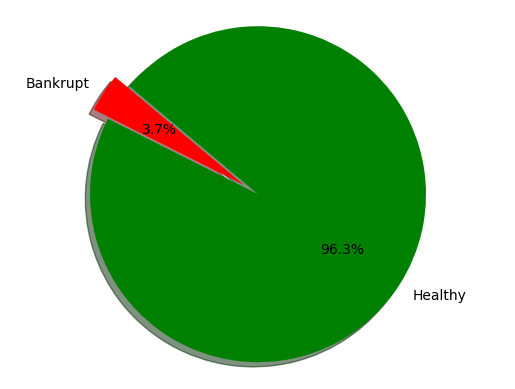

In [15]:

import matplotlib.pyplot as plt
labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0]  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [16]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)
# X_train_wo_sampling = X_train
# y_train_wo_sampling = y_train
X_train = np.array(X)
y_train = np.array(Y)

# OverSampling Data

In [17]:
# Creating more samples units for the bankrupt companies(undersampled data)
y_train = (np.matrix(y_train)).T
y_train = pd.DataFrame(y_train)
y_train.columns = ["Financial_Distress"]
X_train = pd.DataFrame(X_train)
frame = [X_train,y_train]
train_data = pd.concat(frame,axis = 1)
bankrupt_companies = train_data[train_data.Financial_Distress == 1]

feat_mat = bankrupt_companies.iloc[:,:-1].values
response = bankrupt_companies.iloc[:,-1].values
col_mean = np.zeros(shape=(82,1))
col_std = np.zeros(shape=(82,1))
Dim_1 = np.shape(feat_mat)
for i in range(0,Dim_1[1]): # Logic to calculate mean and standard deviation for each column
       col_mean[i,0] = np.mean(feat_mat[:,i])
       col_std[i,0] = np.std(feat_mat[:,i])
col_mean_and_std = np.hstack((col_mean,col_std))

added_data = np.zeros(shape=(3000,Dim_1[1]))
for i in range (0,len(col_mean_and_std)):
       mean_ = col_mean_and_std[i,0]
       std_ = col_mean_and_std[i,1]
       added_data[:,i] = np.random.normal(mean_,std_,3000)
added_y = np.ones(shape=(3000,1)) # Creating labels for the added data

X_resampled = np.vstack((X_train,added_data)) # Combining the original data + added data
y_train = np.array(y_train)
y_resampled = np.vstack((y_train,added_y))

In [18]:
X = X_resampled
Y = y_resampled

In [19]:

num_zeros = 0
for num in Y:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(Y) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)



Number of observations for BANKRUPT companies(1's): 3136
Number of observations for HEALTHY companies(0's): 3536


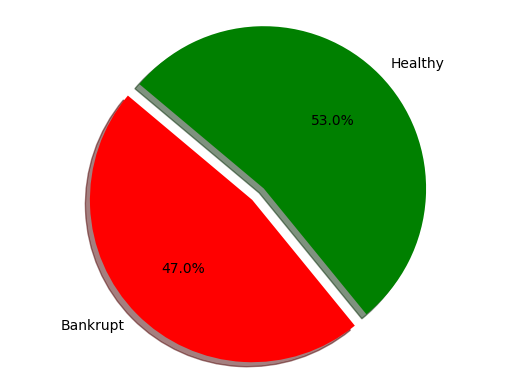

In [20]:

labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0]  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [21]:
''' Standardizing the range of features to have a mean of 0 and standard deviation of 1
allows for better performance and faster convergence during model training.'''
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train.shape

(4670, 82)

In [23]:
X_test.shape


(2002, 82)

In [24]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Create an SVC classifier
classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# prompt: calc Precision  and Recall  and F1 score and Accuracy

# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)



<ipython-input-24-bf3c8797ec2c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Precision: 0.9912472647702407
Recall: 0.9638297872340426
F1 score: 0.9773462783171522
Accuracy: 0.9790209790209791


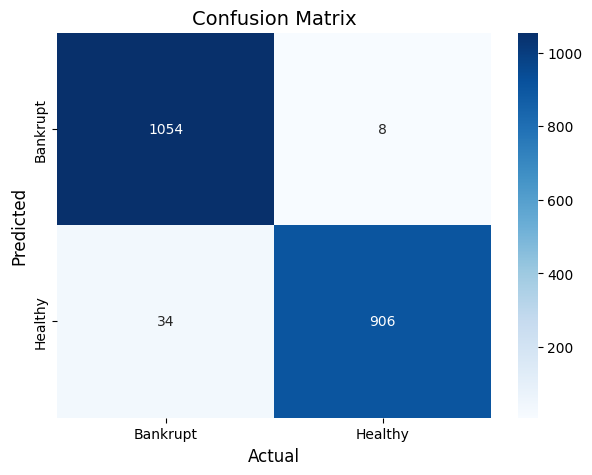

In [25]:

import seaborn as sns

# Create a confusion matrix plot
cm_plot = plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.ylabel("Predicted", fontsize=12)
plt.xlabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

# Show the plot
plt.show()


# **Particle Swarm Optimization**

In [ ]:
!pip install pyswarms

In [ ]:
X.shape

(6672, 82)

In [ ]:
import numpy as np
import pyswarms as ps
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define binary PSO
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Define bounds
max_bound = 1.0 * np.ones(X.shape[1])
min_bound = 0.0 * np.ones(X.shape[1])
bounds = (min_bound, max_bound)

# Objective function
# def f_per_particle(m, alpha):
#     """Computes for the objective function per particle

#     Inputs
#     ------
#     m : numpy.ndarray
#         Binary mask that can be obtained from BinaryPSO, will
#         be used to mask features.
#     alpha: float
#         Penalty factor to control the number of features selected.

#     Returns
#     -------
#     numpy.ndarray
#     """
#     total_features = X.shape[1]
#     # Apply mask to features
#     X_subset = X[:,m>0.5]
#     if X_subset.shape[1] == 0:
#         return float('inf')
#     # Split the dataset
#     X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
#     # Fit the model
#     clf = RandomForestClassifier(n_estimators=50, random_state=42)
#     clf.fit(X_train, y_train)
#     # Predict and calculate accuracy
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     # Calculate objective
#     j = (alpha * (1.0 - accuracy) + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
#     return j

def f_per_particle(m, X, y, alpha):
    """Computes the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    X : numpy.ndarray
        Input features.
    y : numpy.ndarray
        Target labels.
    alpha: float
        Penalty factor to control the number of features selected.

    Returns
    -------
    float
        The computed loss for the particle
    """
    total_features = X.shape[1]
    # Apply mask to features
    X_subset = X[:, m > 0.5]
    if X_subset.shape[1] == 0:
        return float('inf')
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
    # Fit the model
    # clf = SVC(kernel='linear', random_state=0)
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, y_train)
    # Predict and calculate accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Calculate objective
    j = (alpha * (1.0 - accuracy) + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j
# Define objective function
# def f(x, alpha=0.5):
#     """Higher-level method to do classification in the
#     whole swarm.

#     Inputs
#     ------
#     x: numpy.ndarray of shape (n_particles, dimensions)
#         The swarm that will perform the search

#     Returns
#     -------
#     numpy.ndarray of shape (n_particles, )
#         The computed loss for each particle
#     """
#     n_particles = x.shape[0]
#     j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
#     return np.array(j)
def f(x, X, y, alpha=0.5):
    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search
    X : numpy.ndarray
        Input features.
    y : numpy.ndarray
        Target labels.

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], X, y, alpha) for i in range(n_particles)]
    return np.array(j)

# Initialize swarm
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=X.shape[1], options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, X=X, y=Y.ravel())


2024-05-11 00:13:36,532 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.118
2024-05-11 01:29:34,146 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.1177481055529836, best pos: [0.77888841 0.44489553 0.7993476  0.58135223 0.54991215 0.63075445
 0.73844725 0.74270547 0.26754525 0.51954986 0.66648501 0.40118421
 0.54410158 0.30844516 0.69634801 0.72249407 0.70873796 0.8318717
 0.70623896 0.78257832 0.09659007 0.15897499 0.09618276 0.2669902
 0.65911186 0.79048236 0.64989101 0.57685587 0.98741429 0.04845743
 0.61178919 0.39992018 0.96723721 0.35670708 0.73540179 0.5454718
 0.31440732 0.84557133 0.64541747 0.54248339 0.54792847 0.2929086
 0.66561941 0.99310053 0.4775091  0.19676656 0.81676391 0.97893943
 0.93188587 0.94151462 0.81058568 0.80245483 0.51955738 0.56108144
 0.1294621  0.02281821 0.58522723 0.7428586  0.56937307 0.85551647
 0.69108031 

In [ ]:
#'pos' is the variable containing the best position returned by optimizer.optimize()
best_pos = np.array(pos)

print("Position as NumPy Array:", best_pos)


Position as NumPy Array: [0.77888841 0.44489553 0.7993476  0.58135223 0.54991215 0.63075445
 0.73844725 0.74270547 0.26754525 0.51954986 0.66648501 0.40118421
 0.54410158 0.30844516 0.69634801 0.72249407 0.70873796 0.8318717
 0.70623896 0.78257832 0.09659007 0.15897499 0.09618276 0.2669902
 0.65911186 0.79048236 0.64989101 0.57685587 0.98741429 0.04845743
 0.61178919 0.39992018 0.96723721 0.35670708 0.73540179 0.5454718
 0.31440732 0.84557133 0.64541747 0.54248339 0.54792847 0.2929086
 0.66561941 0.99310053 0.4775091  0.19676656 0.81676391 0.97893943
 0.93188587 0.94151462 0.81058568 0.80245483 0.51955738 0.56108144
 0.1294621  0.02281821 0.58522723 0.7428586  0.56937307 0.85551647
 0.69108031 0.50740723 0.77345081 0.58379247 0.66196942 0.93829071
 0.57106563 0.59501936 0.7264692  0.64911789 0.55624739 0.59460767
 0.20977479 0.50004377 0.82035847 0.8765411  0.72187629 0.68472129
 0.57979817 0.73501115 0.72520889 0.65446296]


In [ ]:
# Define a threshold to determine whether a feature is selected
threshold = 0.6

# Create a boolean mask from 'best_pos' based on the threshold
selected_features_mask = best_pos > threshold

# df_cleaned.columns[:-1] gives you all feature names excluding the target variable
feature_names = data.iloc[:,2:].columns[:-1]  # Modify this as necessary

# Use the mask to select the names of the features
selected_features = feature_names[selected_features_mask]

print("Selected Features:", selected_features)

Selected Features: Index(['Financial Distress', 'x2', 'x5', 'x6', 'x7', 'x10', 'x14', 'x15',
       'x16', 'x17', 'x18', 'x19', 'x24', 'x25', 'x26', 'x28', 'x30', 'x32',
       'x34', 'x37', 'x38', 'x42', 'x43', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x57', 'x59', 'x60', 'x62', 'x64', 'x65', 'x68', 'x69', 'x74',
       'x75', 'x76', 'x77', 'x79', 'x81', 'x82'],
      dtype='object')


In [ ]:
selected=selected_features.values.tolist()

In [ ]:
# Filter the DataFrame to include only the selected features
mask = np.isin(data.iloc[:,3:].columns,selected)
X_selected = X[:,mask]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)


In [ ]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (4670, 43)
y_train (4670, 1)
X_test (2002, 43)
y_test (2002, 1)


<ipython-input-37-6e654137c122>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Precision: 0.994413407821229
Recall: 0.967391304347826
F1 score: 0.9807162534435261
Accuracy: 0.9825174825174825


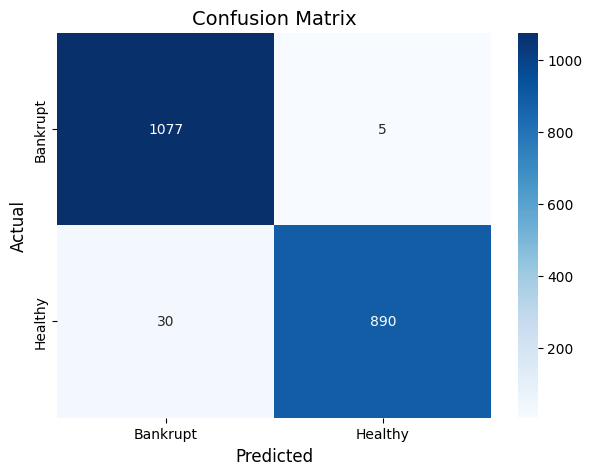

In [ ]:
# prompt: applay SVC on data
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Create an SVC classifier
classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = classifier.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Calculate precision, recall, and F1 score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)




# Create a confusion matrix plot
cm_plot = plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

# Show the plot
plt.show()
